In [1]:
%reload_ext autoreload
%autoreload 2
import os, sys
import copy
import numpy as np
import pandas as pd
import math
from scipy import stats
import re
from matplotlib import pyplot as plt
import matplotlib.cm as mpcm
import function as func
np.set_printoptions(threshold=20)
from IPython.display import display 

plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

# DOSUE-Y OMT gamagori2025-1 <br>   comparison between HFSS (gamagori2025-1) & VNA measurement

In [19]:
HFSS_inputdir = 'input'
HFSS_inputfile_list = ['gamagori2025-1/ReturnLoss_H.csv', 'gamagori2025-1/ReturnLoss_V.csv', 'gamagori2025-1_wtH-polAdapter/InsertionLoss_H.csv', 'gamagori2025-1_wtV-polAdapter/InsertionLoss_V.csv']
HFSS_inputfile_list = ['gamagori2025-1/ReturnLoss_H.csv', 'gamagori2025-1/ReturnLoss_V.csv', 'gamagori2025-1_wtH-polAdapter/InsertionLoss_H.csv', 'gamagori2025-1_wtV-polAdapter/InsertionLoss_V.csv']
HFSS_inputkey_list = ['', '', '', ''] # [Hpol, Vpol, Hpol, Vpol] / port2=  V-pol, port3 = H-pol
VNA_inputdir = '/data/analysis/adachi/data/20250425_OMT-Y'
VNA_inputfile_list = ['Hpol.csv', 'Vpol.csv', 'Hpol.csv', 'Vpol.csv']
VNA_input_ncol_list = [1, 1, 2, 2] # 2 corresponds to S21

## Read HFSS data

Freq
dB(S(1:2,1:2))
Freq
dB(S(1:1,1:1))
Freq
dB(S(3:1,1:1))
Freq
dB(S(2:1,1:1))
     Freq      Power
0     165 -25.232925
1     166 -32.370779
2     167 -39.261106
3     168 -28.720174
4     169 -25.815053
..    ...        ...
96    261 -27.176539
97    262 -26.811858
98    263 -27.498249
99    264 -29.834669
100   265 -34.798303

[101 rows x 2 columns]
Index(['Freq', 'Power'], dtype='object')
0      165
1      166
2      167
3      168
4      169
      ... 
96     261
97     262
98     263
99     264
100    265
Name: Freq, Length: 101, dtype: int64


,Freq,Power
0,165,-2.603411
1,166,-2.921688
2,167,-3.214895
3,168,-3.297088
4,169,-3.189478
...,...,...
96,261,-7.117354
97,262,-7.237565
98,263,-7.270664
99,264,-7.246531


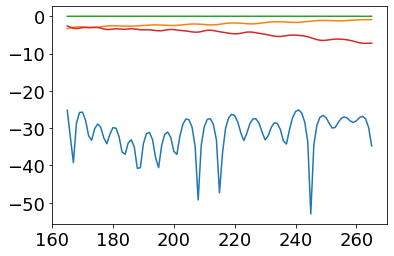

In [20]:
HFSS_data_list = func.read_HFSS_data(HFSS_inputdir, HFSS_inputfile_list, HFSS_inputkey_list, verbose=1)
display(HFSS_data_list[-1])

for _data in HFSS_data_list:
    plt.plot(_data['Freq'], _data['Power'])
    pass

## Read VNA data

[{'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-22.346418, -22.29361 , -22.291107, ..., -20.121336, -20.053825,
       -20.039377])}, {'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-12.54017  , -12.597093 , -12.693907 , ...,  -7.2989168,
        -7.3069506,  -7.3220191])}, {'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-0.91481107, -0.89350086, -0.87678927, ..., -1.7191261 ,
       -1.7134323 , -1.709793  ])}, {'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([ -3.8569269,  -3.9453075,  -4.0076256, ..., -15.922423 ,
       -15.93439  , -15.929551 ])}]


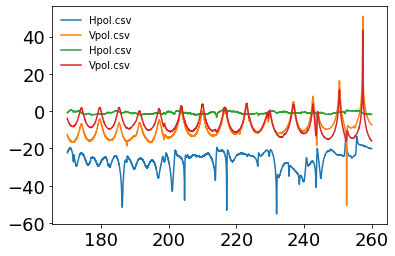

In [21]:
VNA_data_list = []
for _file, _ncol in zip(VNA_inputfile_list, VNA_input_ncol_list):
    _filepath = f'{VNA_inputdir}/{_file}'
    _freq, _power = func.read_csv(_filepath, csvType='VNA', nchannel=0, ncolumn=_ncol)
    VNA_data_list.append({'Freq':_freq, 'Power':func.ratio_to_dB(_power)})
    pass
print(VNA_data_list)

for _data, _input in zip(VNA_data_list, VNA_inputfile_list):
    plt.plot(_data['Freq'], _data['Power'], label=_input)
    pass
plt.legend(frameon=False)

252.26: -15.474999
252.27: -15.307770
252.28: -15.225038
252.29: -15.238885
252.30: -15.183677
252.31: -15.235179
252.32: -15.325089
252.33: -15.445684
255.53: -15.360741
255.54: -14.893086
255.55: -14.536640
255.56: -14.317360
255.57: -14.007674
255.58: -13.777341
255.59: -13.677597
255.60: -13.591832
255.61: -13.575822
255.62: -13.601243
255.63: -13.630100
255.64: -13.761779
255.65: -13.803204
255.66: -13.982926
255.67: -14.130182
255.68: -14.264589
255.69: -14.468213
255.70: -14.583918
255.71: -14.740250
255.72: -14.831286
255.73: -14.999488
255.74: -15.175068
255.75: -15.309043
255.76: -15.402388


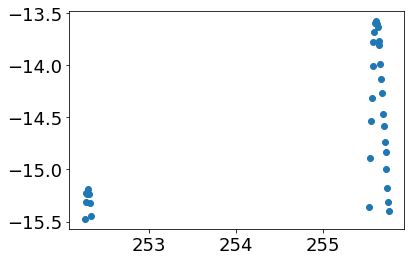

In [32]:
# H-pol S11
_ndata = 0 # H-pol S11
_threshold = -15.5
index_high_value = np.where(VNA_data_list[_ndata]['Power'] > _threshold)
_high_freq = VNA_data_list[_ndata]['Freq'][index_high_value]
_high_power = VNA_data_list[_ndata]['Power'][index_high_value]
plt.scatter(_high_freq, _high_power, label=f'H-pol S11 power > {_threshold} dB')
for _f, _p in zip(_high_freq, _high_power):
    print(f'{_f:.2f}: {_p:f}')
    pass
# --> 252.30 GHz and 255.61 GHz are peaks

## Plot S11

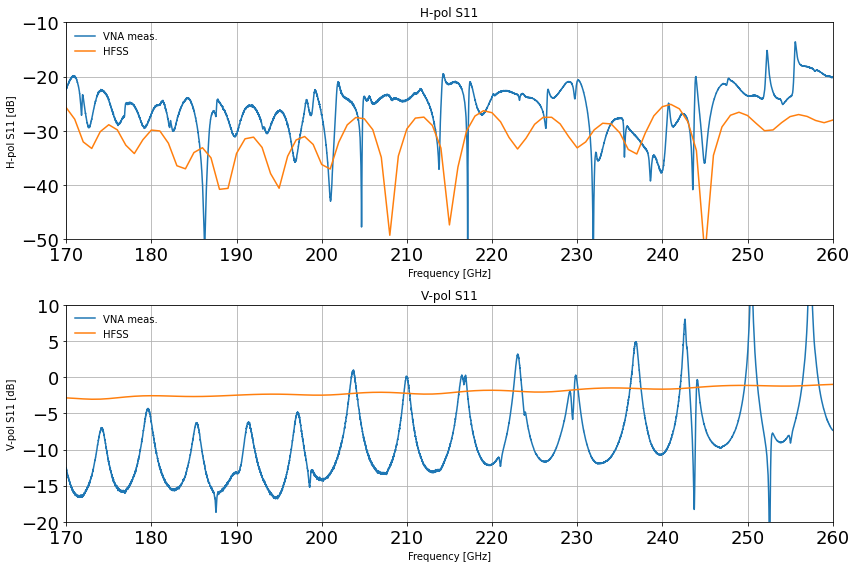

In [5]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))
_xlim = [170, 260]

### plot H-pol
_ylim = [-50, -10]
_title = 'H-pol S11'
_label = 'H-pol S11 [dB]'
_VNA = VNA_data_list[0]
_HFSS = HFSS_data_list[0]

_ax = axs[0]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
_ax.plot(_HFSS['Freq'], _HFSS['Power'], label='HFSS')
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_label)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S11'
_label = 'V-pol S11 [dB]'
_VNA = VNA_data_list[1]
_HFSS = HFSS_data_list[1]

_ax = axs[1]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
_ax.plot(_HFSS['Freq'], _HFSS['Power'], label='HFSS')
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_label)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

fig.tight_layout()

## Plot S21

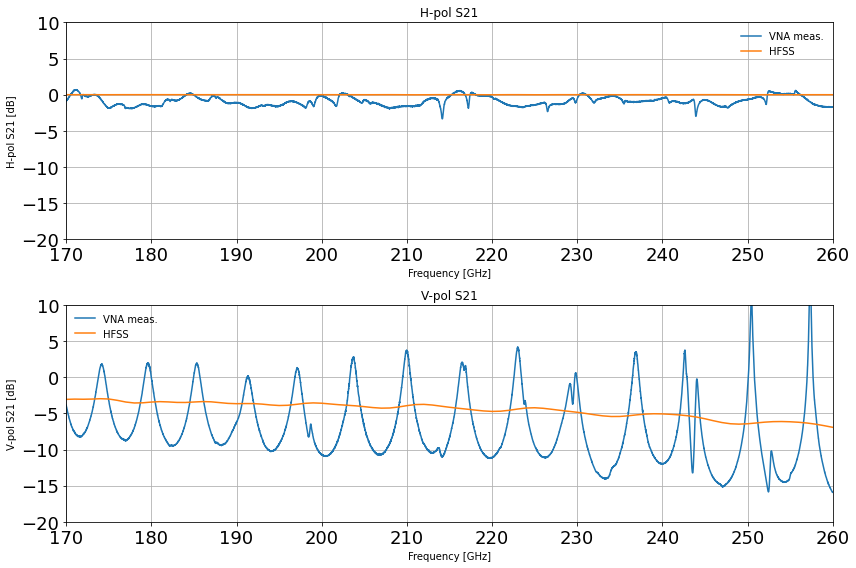

In [6]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))
_xlim = [170, 260]

### plot H-pol
_ylim = [-20, 10]
_title = 'H-pol S21'
_label = 'H-pol S21 [dB]'
_VNA = VNA_data_list[2]
_HFSS = HFSS_data_list[2]

_ax = axs[0]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
_ax.plot(_HFSS['Freq'], _HFSS['Power'], label='HFSS')
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_label)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S21'
_label = 'V-pol S21 [dB]'
_VNA = VNA_data_list[3]
_HFSS = HFSS_data_list[3]

_ax = axs[1]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
_ax.plot(_HFSS['Freq'], _HFSS['Power'], label='HFSS')
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_label)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

fig.tight_layout()

# DOSUE-Y OMT gamagori2025-1 <br>   comparison between HFSS (gamagori2025-1) & VNA measurement (S11)

In [7]:
HFSS_inputdir = 'input'
HFSS_inputfile_list = ['gamagori2025-1/ReturnLoss_H.csv', 
                       'gamagori2025-1_wtH-polAdapter/ReturnLoss_H.csv', 
                       'gamagori2025-1/ReturnLoss_V.csv', 
                       'gamagori2025-1_wtV-polAdapter/ReturnLoss_V.csv',
                       'gamagori2025-1_wtV-polAdapter_wtWR4.3/ReturnLoss_V.csv',
                       'gamagori2025-1_wtV-polAdapter_wtStepChipped/ReturnLoss_V.csv',
                       'gamagori2025-1_wtV-polAdapter_wtOffCenterWG/ReturnLoss_V.csv',
                       'gamagori2025-1_wtV-polAdapter_wtStepChipped_wtOffCenterWG/ReturnLoss_V.csv',
                       'gamagori2025-1_wtH-polAdapter_wtStepChipped/ReturnLoss_H.csv',
                       'gamagori2025-1_wtH-polAdapter_wtOffCenterWG/ReturnLoss_H.csv',
                       'gamagori2025-1_wtH-polAdapter_wtStepChipped_wtOffCenterWG/ReturnLoss_H.csv',
                      ]
HFSS_inputkey_list = ['', '', '', '', '', '', '', '', '', '', '']

VNA_inputdir = '/data/analysis/adachi/data/20250425_OMT-Y'
VNA_inputfile_list = ['Hpol.csv', 'Vpol.csv']
VNA_input_ncol_list = [1, 1] # 2 corresponds to S21

In [8]:
# read HFSS data
HFSS_data_list = func.read_HFSS_data(HFSS_inputdir, HFSS_inputfile_list, HFSS_inputkey_list, verbose=0)
print('Show the last data')
display(HFSS_data_list[-1])

# read VNA data
VNA_data_list = []
for _file, _ncol in zip(VNA_inputfile_list, VNA_input_ncol_list):
    _filepath = f'{VNA_inputdir}/{_file}'
    _freq, _power = func.read_csv(_filepath, csvType='VNA', nchannel=0, ncolumn=_ncol)
    VNA_data_list.append({'Freq':_freq, 'Power':func.ratio_to_dB(_power)})
    pass
print(VNA_data_list)

Show the last data


,Freq,Power
0,165,-22.594428
1,166,-29.205010
2,167,-27.545213
3,168,-24.591123
4,169,-26.286194
...,...,...
96,261,-26.410720
97,262,-24.885891
98,263,-24.474543
99,264,-25.698824


[{'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-22.346418, -22.29361 , -22.291107, ..., -20.121336, -20.053825,
       -20.039377])}, {'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-12.54017  , -12.597093 , -12.693907 , ...,  -7.2989168,
        -7.3069506,  -7.3220191])}]


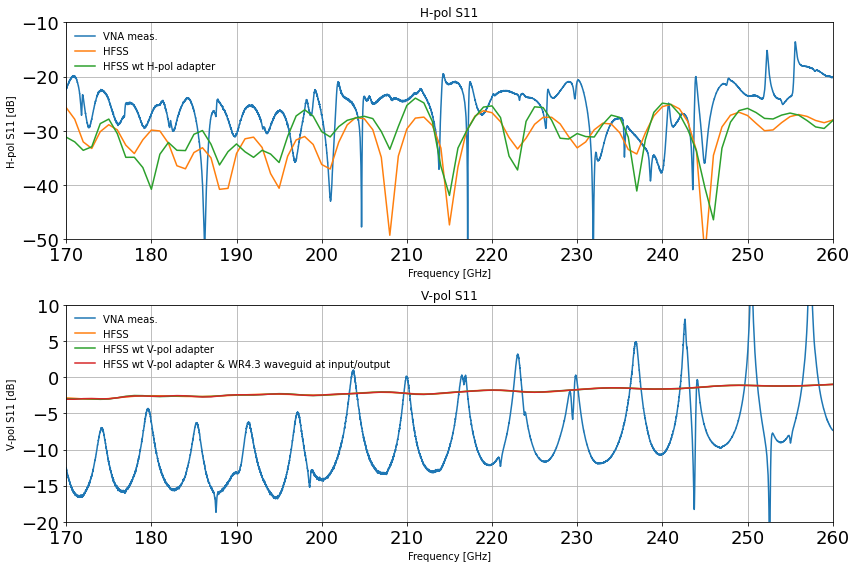

In [9]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))
_xlim = [170, 260]

### plot H-pol
_ylim = [-50, -10]
_title = 'H-pol S11'
_ylabel = 'H-pol S11 [dB]'
_VNA = VNA_data_list[0]
_HFSS_list = HFSS_data_list[0:2]
_HFSS_label_list = ['HFSS', 'HFSS wt H-pol adapter']

_ax = axs[0]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S11'
_ylabel = 'V-pol S11 [dB]'
_VNA = VNA_data_list[1]
_HFSS_list = HFSS_data_list[2:5]
_HFSS_label_list = ['HFSS', 'HFSS wt V-pol adapter', 'HFSS wt V-pol adapter & WR4.3 waveguid at input/output']

_ax = axs[1]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

fig.tight_layout()

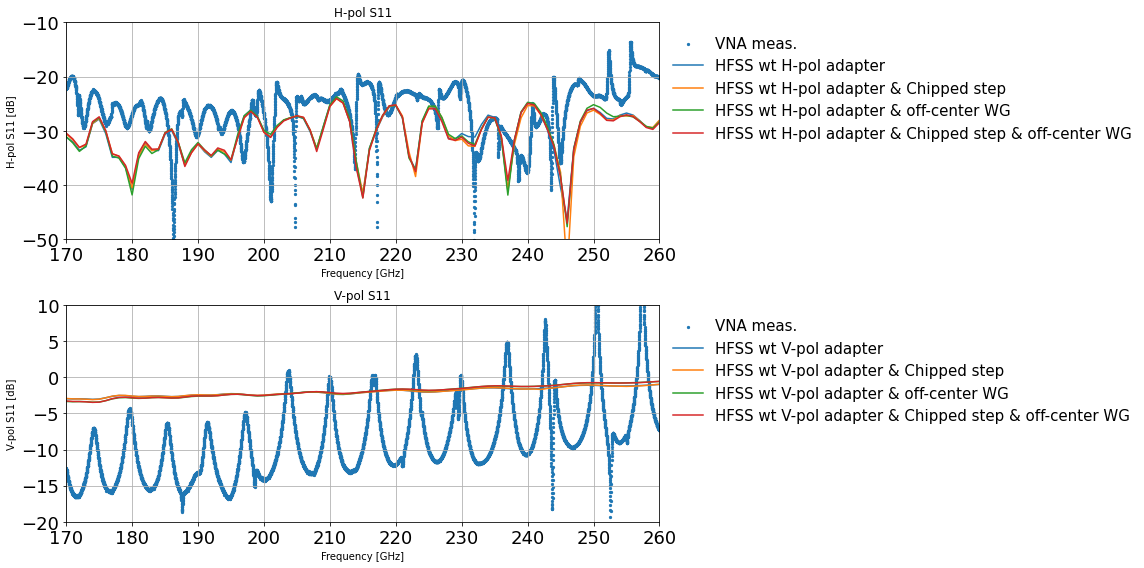

In [10]:
fig, axs = plt.subplots(2,1,figsize=(16, 8))
_xlim = [170, 260]

### plot H-pol
_ylim = [-50, -10]
_title = 'H-pol S11'
_ylabel = 'H-pol S11 [dB]'
_VNA = VNA_data_list[0]
_HFSS_list = HFSS_data_list[1:2] + HFSS_data_list[8:]
_HFSS_label_list = [#'HFSS', 
                    'HFSS wt H-pol adapter', 
                    'HFSS wt H-pol adapter & Chipped step', 
                    'HFSS wt H-pol adapter & off-center WG', 
                    'HFSS wt H-pol adapter & Chipped step & off-center WG',
                   ]

_ax = axs[0]
_ax.scatter(_VNA['Freq'], _VNA['Power'], label='VNA meas.', s=5)
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
_ax.grid(True)

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S11'
_ylabel = 'V-pol S11 [dB]'
_VNA = VNA_data_list[1]
_HFSS_list = HFSS_data_list[3:4] + HFSS_data_list[5:8]
_HFSS_label_list = [#'HFSS', 
                    'HFSS wt V-pol adapter', 
                    #'HFSS wt V-pol adapter & WR4.3 waveguide at input/output',
                    'HFSS wt V-pol adapter & Chipped step', 
                    'HFSS wt V-pol adapter & off-center WG', 
                    'HFSS wt V-pol adapter & Chipped step & off-center WG',
                   ]

_ax = axs[1]
_ax.scatter(_VNA['Freq'], _VNA['Power'], label='VNA meas.', s=5)
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), fontsize=15)
_ax.grid(True)

fig.tight_layout()

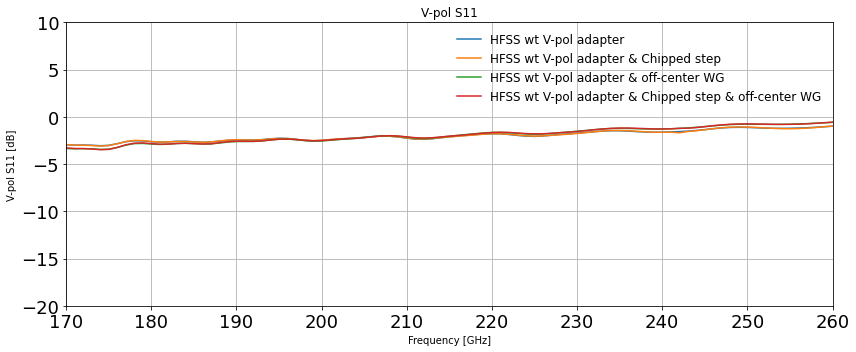

In [11]:
# V-pol HFSS only
fig, axs = plt.subplots(1,1,figsize=(12, 5), squeeze=True)
_xlim = [170, 260]

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S11'
_ylabel = 'V-pol S11 [dB]'
_VNA = VNA_data_list[1]
_HFSS_list = HFSS_data_list[2::]
_HFSS_label_list = ['HFSS', 
                    'HFSS wt V-pol adapter', 'HFSS wt V-pol adapter & WR4.3 waveguid at input/output',
                    'HFSS wt V-pol adapter & Chipped step', 'HFSS wt V-pol adapter & off-center WG', 
                    'HFSS wt V-pol adapter & Chipped step & off-center WG',
                   ]

_doPlot = np.array([False, True, False, True, True, True])
_ax = axs
for i, (_HFSS, _label) in enumerate(zip(_HFSS_list, _HFSS_label_list)):
    if not _doPlot[i]: continue
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False, fontsize=12)
_ax.grid(True)

fig.tight_layout()

# DOSUE-Y OMT gamagori2025-1 <br>   comparison between HFSS (gamagori2025-1) & VNA measurement (S21)

In [12]:
HFSS_inputdir = 'input'
HFSS_inputfile_list = ['gamagori2025-1/InsertionLoss_H.csv', 
                       'gamagori2025-1_wtH-polAdapter/InsertionLoss_H.csv', 
                       'gamagori2025-1/InsertionLoss_V.csv', 
                       'gamagori2025-1_wtV-polAdapter/InsertionLoss_V.csv',
                       'gamagori2025-1_wtV-polAdapter_wtWR4.3/InsertionLoss_V.csv']
HFSS_inputkey_list = ['', '', '', '', '']

VNA_inputdir = '/data/analysis/adachi/data/20250425_OMT-Y'
VNA_inputfile_list = ['Hpol.csv', 'Vpol.csv']
VNA_input_ncol_list = [2, 2] # 2 corresponds to S21

In [13]:
# read HFSS data
HFSS_data_list = func.read_HFSS_data(HFSS_inputdir, HFSS_inputfile_list, HFSS_inputkey_list, verbose=0)
print('Show the last data')
display(HFSS_data_list[-1])

# read VNA data
VNA_data_list = []
for _file, _ncol in zip(VNA_inputfile_list, VNA_input_ncol_list):
    _filepath = f'{VNA_inputdir}/{_file}'
    _freq, _power = func.read_csv(_filepath, csvType='VNA', nchannel=0, ncolumn=_ncol)
    VNA_data_list.append({'Freq':_freq, 'Power':func.ratio_to_dB(_power)})
    pass
print(VNA_data_list)

Show the last data


,Freq,Power
0,165,-2.652357
1,166,-3.028805
2,167,-3.294095
3,168,-3.301765
4,169,-3.125362
...,...,...
96,261,-7.108857
97,262,-7.216671
98,263,-7.262186
99,264,-7.251282


[{'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([-0.91481107, -0.89350086, -0.87678927, ..., -1.7191261 ,
       -1.7134323 , -1.709793  ])}, {'Freq': array([170.  , 170.01, 170.02, ..., 259.98, 259.99, 260.  ]), 'Power': array([ -3.8569269,  -3.9453075,  -4.0076256, ..., -15.922423 ,
       -15.93439  , -15.929551 ])}]


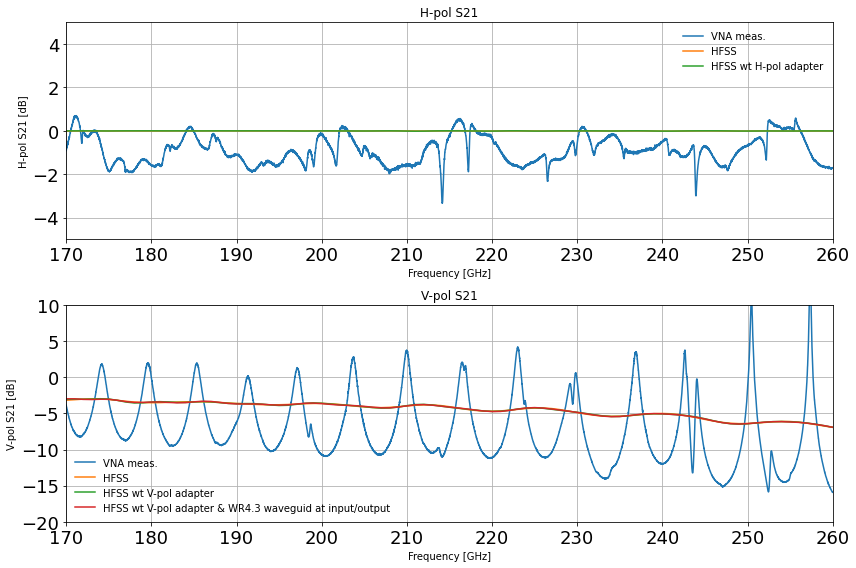

In [14]:
fig, axs = plt.subplots(2,1,figsize=(12, 8))
_xlim = [170, 260]

### plot H-pol
_ylim = [-5, 5]
_title = 'H-pol S21'
_ylabel = 'H-pol S21 [dB]'
_VNA = VNA_data_list[0]
_HFSS_list = HFSS_data_list[0:2]
_HFSS_label_list = ['HFSS', 'HFSS wt H-pol adapter']

_ax = axs[0]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

### plot V-pol
_ylim = [-20, 10]
_title = 'V-pol S21'
_ylabel = 'V-pol S21 [dB]'
_VNA = VNA_data_list[1]
_HFSS_list = HFSS_data_list[2::]
_HFSS_label_list = ['HFSS', 'HFSS wt V-pol adapter', 'HFSS wt V-pol adapter & WR4.3 waveguid at input/output']

_ax = axs[1]
_ax.plot(_VNA['Freq'], _VNA['Power'], label='VNA meas.')
for _HFSS, _label in zip(_HFSS_list, _HFSS_label_list):
    _ax.plot(_HFSS['Freq'], _HFSS['Power'], label=_label)
    pass
_ax.set_xlabel('Frequency [GHz]')
_ax.set_ylabel(_ylabel)
_ax.set_title(_title)
_ax.set_xlim(_xlim)
_ax.set_ylim(_ylim)
_ax.legend(frameon=False)
_ax.grid(True)

fig.tight_layout()